<a href="https://colab.research.google.com/github/John-Richard-Bercades/-CSST106-4B/blob/main/4B_BERCADES_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INSTAL NECESSARY PACKAGES**

In [ ]:

!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

In [ ]:

!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [ ]:

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337687, done.
remote: Counting objects: 100% (907/907), done.
remote: Compressing objects: 100% (714/714), done.
remote: Total 337687 (delta 375), reused 476 (delta 155), pack-reused 336780 (from 1)
Receiving objects: 100% (337687/337687), 528.18 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (235514/235514), done.
Updating files: 100% (7566/7566), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41779, done.
remote: Counting objects: 100% (1529/1529), done.
remote: Compressing objects: 100% (1111/1111), done.
remote: Total 41779 (delta 582), reused 1018 (delta 329), pack-reused 40250 (from 1)
Receiving objects: 100% (41779/41779), 150.33 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (25715/25715), done.


In [ ]:

%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  7%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

# ***Step 1: Load Images***

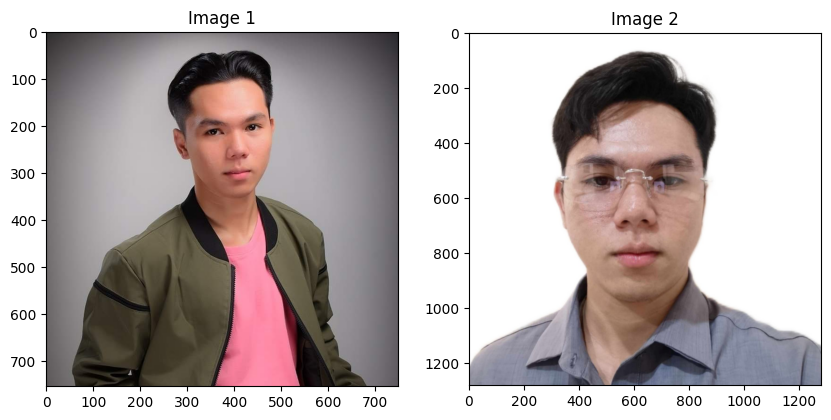

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load two images
image1 = cv2.imread('/content/FB_IMG.jpg')
image2 = cv2.imread('/content/IMG_20240909_141722_559.jpg')

# Convert the images to RGB (for displaying using matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the two images
plt.figure(figsize=(10, 5))

# Image 1
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.title('Image 1')

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(image2_rgb)
plt.title('Image 2')

plt.show()


# ***Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB***

Extracting SIFT keypoints for image1


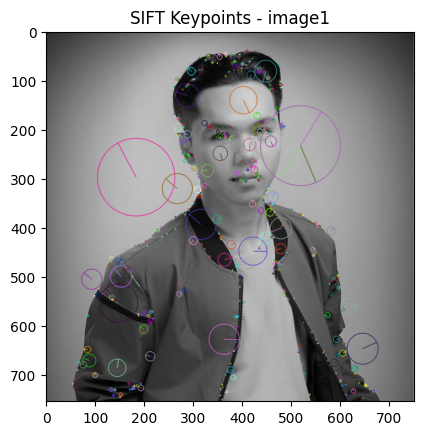

Extracting SURF keypoints for image1


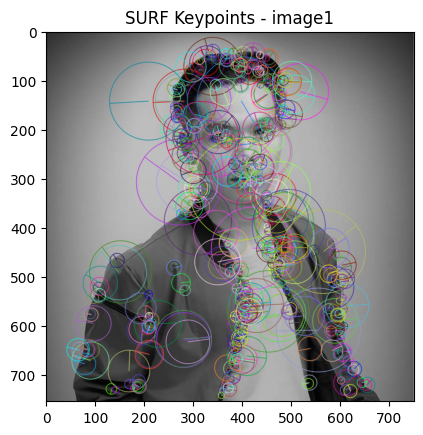

Extracting ORB keypoints for image1


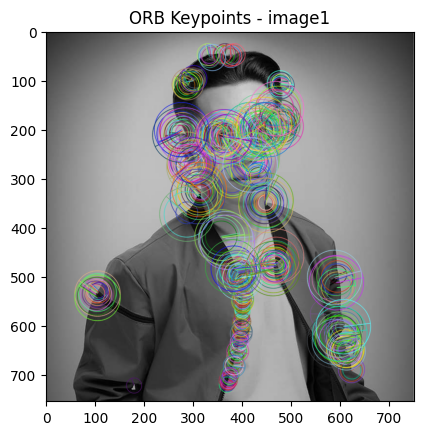

Extracting SIFT keypoints for image2


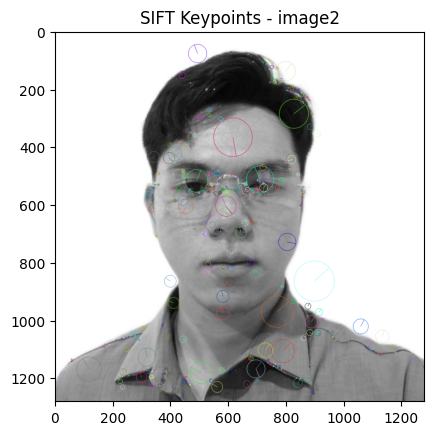

Extracting SURF keypoints for image2


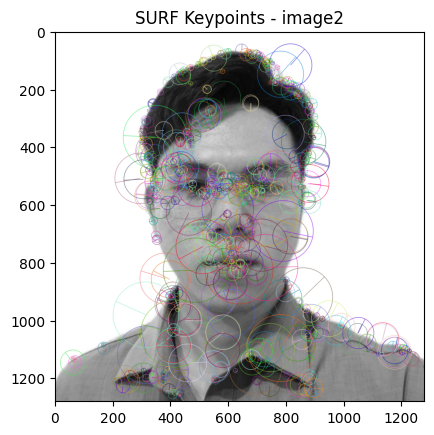

Extracting ORB keypoints for image2


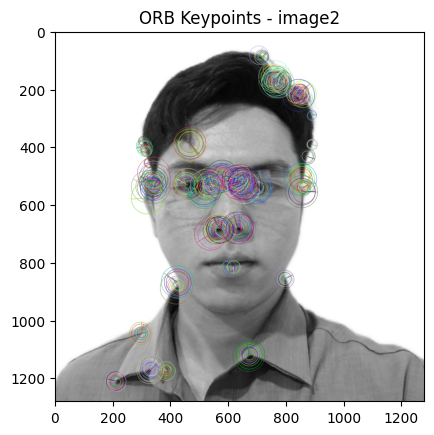

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the two images
image1 = cv2.imread('/content/FB_IMG.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/IMG_20240909_141722_559.jpg', cv2.IMREAD_GRAYSCALE)

# Function to display and save images with keypoints
def display_and_save_keypoints(image, keypoints, title, filename):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the image with keypoints
    cv2.imwrite(filename, img_with_keypoints)

    # Display the image with keypoints
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title(title)
    plt.show()

# SIFT Feature Extraction
def sift_feature_extraction(image, img_name):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    display_and_save_keypoints(image, keypoints, f'SIFT Keypoints - {img_name}', f'sift_keypoints_{img_name}.jpg')
    return keypoints, descriptors

# SURF Feature Extraction (change the hessian threshold if needed)
def surf_feature_extraction(image, img_name):
    surf = cv2.xfeatures2d.SURF_create(400)
    keypoints, descriptors = surf.detectAndCompute(image, None)
    display_and_save_keypoints(image, keypoints, f'SURF Keypoints - {img_name}', f'surf_keypoints_{img_name}.jpg')
    return keypoints, descriptors

# ORB Feature Extraction
def orb_feature_extraction(image, img_name):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    display_and_save_keypoints(image, keypoints, f'ORB Keypoints - {img_name}', f'orb_keypoints_{img_name}.jpg')
    return keypoints, descriptors

# Process both images with SIFT, SURF, and ORB
for idx, img in enumerate([image1, image2], start=1):
    img_name = f'image{idx}'

    # SIFT
    print(f"Extracting SIFT keypoints for {img_name}")
    sift_feature_extraction(img, img_name)

    # SURF
    print(f"Extracting SURF keypoints for {img_name}")
    surf_feature_extraction(img, img_name)

    # ORB
    print(f"Extracting ORB keypoints for {img_name}")
    orb_feature_extraction(img, img_name)


# ***Step 3: Feature Matching with Brute-Force and FLANN***

Running SIFT Feature Matching


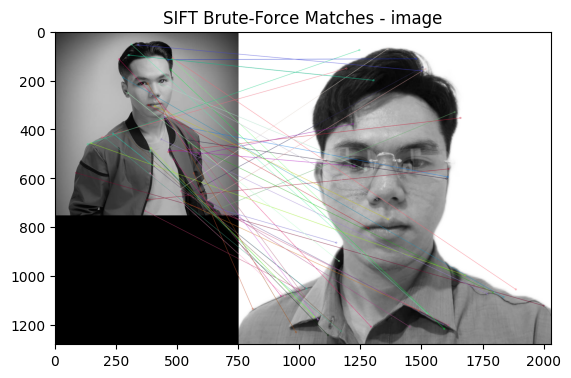

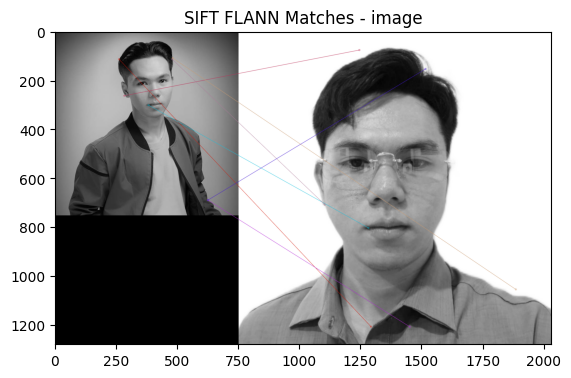

Running SURF Feature Matching


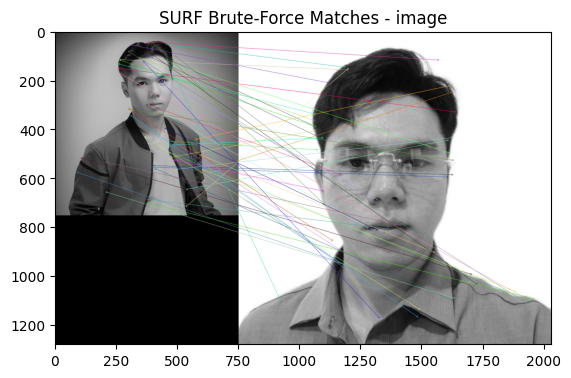

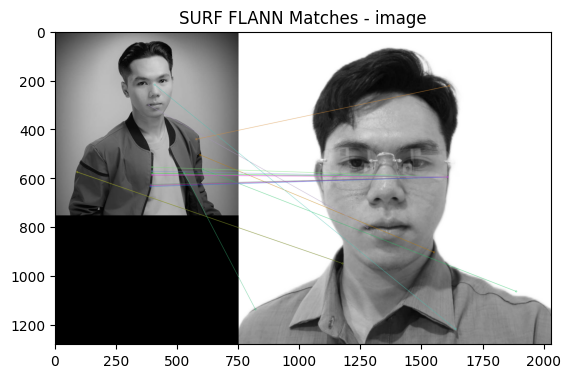

Running ORB Feature Matching


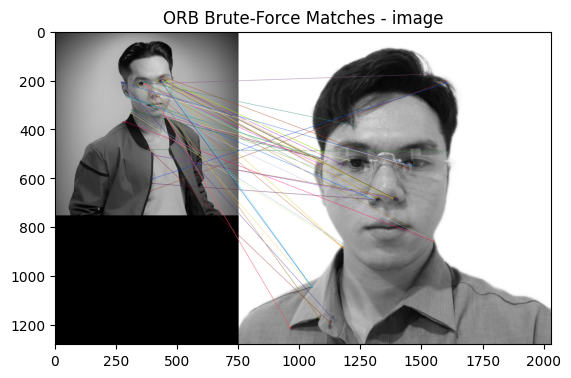

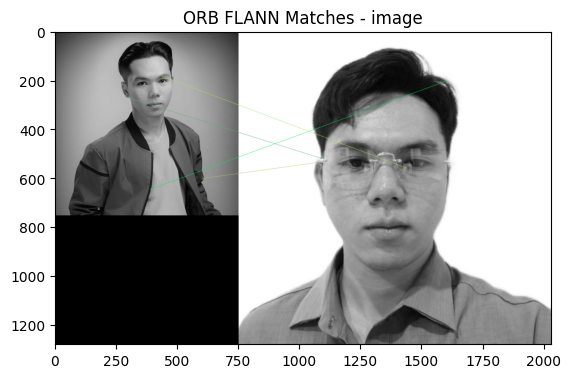

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the two images in grayscale
image1 = cv2.imread('/content/FB_IMG.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/IMG_20240909_141722_559.jpg', cv2.IMREAD_GRAYSCALE)

# Function to display and save matching results
def display_and_save_matches(image1, image2, kp1, kp2, matches, title, filename):
    matched_image = cv2.drawMatches(image1, kp1, image2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Save the image with matches
    cv2.imwrite(filename, matched_image)

    # Display the image with matches
    plt.imshow(matched_image)
    plt.title(title)
    plt.show()

# Brute-Force Matcher
def brute_force_matching(des1, des2, kp1, kp2, image1, image2, algorithm, img_name):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    display_and_save_matches(image1, image2, kp1, kp2, matches[:50], f'{algorithm} Brute-Force Matches - {img_name}', f'{algorithm.lower()}_bf_match_{img_name}.jpg')

# FLANN Matcher
def flann_matching(des1, des2, kp1, kp2, image1, image2, algorithm, img_name):
    index_params = dict(algorithm=1, trees=5)  # FLANN parameters (algorithm 1 = KDTree)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    display_and_save_matches(image1, image2, kp1, kp2, good_matches[:50], f'{algorithm} FLANN Matches - {img_name}', f'{algorithm.lower()}_flann_match_{img_name}.jpg')

# SIFT Feature Matching
def sift_feature_matching(img1, img2):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Brute-Force matching for SIFT
    brute_force_matching(des1, des2, kp1, kp2, img1, img2, 'SIFT', 'image')

    # FLANN matching for SIFT
    flann_matching(des1, des2, kp1, kp2, img1, img2, 'SIFT', 'image')

# SURF Feature Matching
def surf_feature_matching(img1, img2):
    surf = cv2.xfeatures2d.SURF_create(400)
    kp1, des1 = surf.detectAndCompute(img1, None)
    kp2, des2 = surf.detectAndCompute(img2, None)

    # Brute-Force matching for SURF
    brute_force_matching(des1, des2, kp1, kp2, img1, img2, 'SURF', 'image')

    # FLANN matching for SURF
    flann_matching(des1, des2, kp1, kp2, img1, img2, 'SURF', 'image')

# ORB Feature Matching
def orb_feature_matching(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Brute-Force matching for ORB (using Hamming distance)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    display_and_save_matches(img1, img2, kp1, kp2, matches[:50], 'ORB Brute-Force Matches - image', 'orb_bf_match_image.jpg')

    # FLANN matching for ORB (FLANN doesn't directly support ORB's binary descriptors, so we need to tweak the params)
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)  # LSH
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    display_and_save_matches(img1, img2, kp1, kp2, good_matches[:50], 'ORB FLANN Matches - image', 'orb_flann_match_image.jpg')

# Run SIFT, SURF, and ORB Feature Matching
print("Running SIFT Feature Matching")
sift_feature_matching(image1, image2)

print("Running SURF Feature Matching")
surf_feature_matching(image1, image2)

print("Running ORB Feature Matching")
orb_feature_matching(image1, image2)


# ***Step 4: Image Alignment Using Homography***

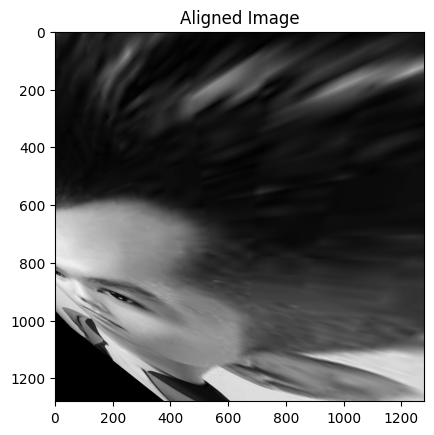

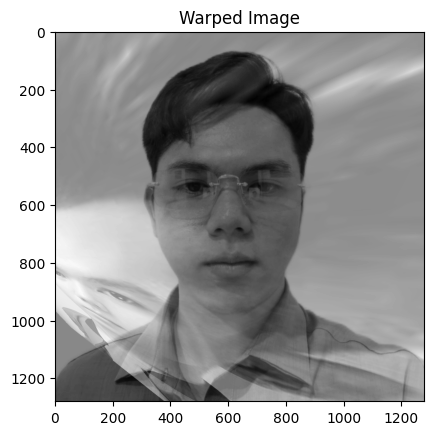

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the two images in grayscale
image1 = cv2.imread('/content/FB_IMG.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/IMG_20240909_141722_559.jpg', cv2.IMREAD_GRAYSCALE)

# Function to find homography using matched keypoints
def find_homography(kp1, kp2, matches):
    # Extract location of matched keypoints
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute the homography matrix
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return H, mask

# Function to warp image using homography matrix
def warp_image(image, H, reference_image):
    height, width = reference_image.shape
    warped_image = cv2.warpPerspective(image, H, (width, height))
    return warped_image

# Function to display and save images
def display_and_save_image(image, title, filename):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
    cv2.imwrite(filename, image)

# SIFT Feature Extraction and Matching
def sift_feature_matching_and_alignment(img1, img2):
    # Detect and compute keypoints and descriptors using SIFT
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Brute-Force matcher with cross-check for SIFT descriptors
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Select good matches
    good_matches = matches[:50]  # Use top 50 matches

    # Compute the homography matrix
    H, mask = find_homography(kp1, kp2, good_matches)

    # Warp image1 to align with image2 using the homography matrix
    aligned_image = warp_image(img1, H, img2)

    # Display and save aligned image
    display_and_save_image(aligned_image, 'Aligned Image', 'aligned_image.jpg')

    # Display and save warped image
    display_and_save_image(cv2.addWeighted(img2, 0.5, aligned_image, 0.5, 0), 'Warped Image', 'warped_image.jpg')

# Run SIFT-based feature matching and image alignment
sift_feature_matching_and_alignment(image1, image2)


# ***Step 5: Performance Analysis***

Analyzing SIFT...

Method: SIFT
Number of keypoints in Image 1: 509
Number of keypoints in Image 2: 451
Keypoint detection time: 0.7353 seconds
Brute-Force matching time: 0.0118 seconds
FLANN matching time: 0.0140 seconds
Number of Brute-Force matches: 99
Number of good FLANN matches: 6


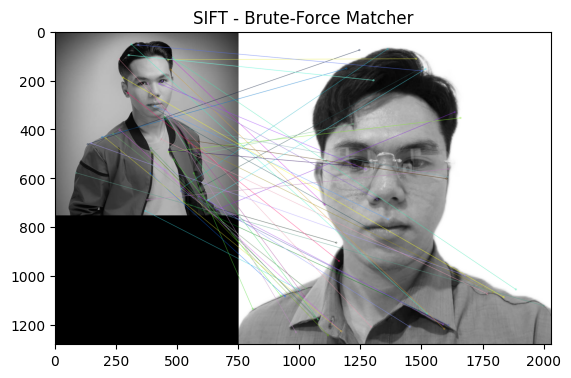

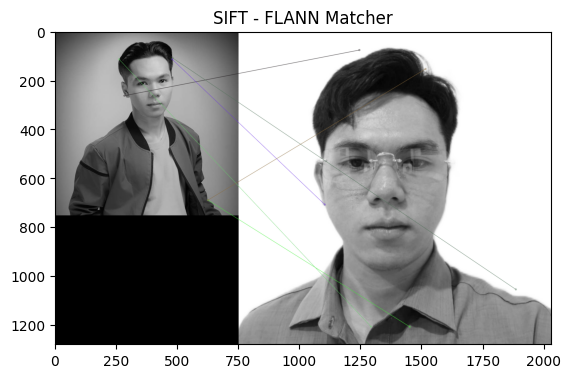


Analyzing SURF...

Method: SURF
Number of keypoints in Image 1: 550
Number of keypoints in Image 2: 623
Keypoint detection time: 0.8663 seconds
Brute-Force matching time: 0.0106 seconds
FLANN matching time: 0.0143 seconds
Number of Brute-Force matches: 129
Number of good FLANN matches: 16


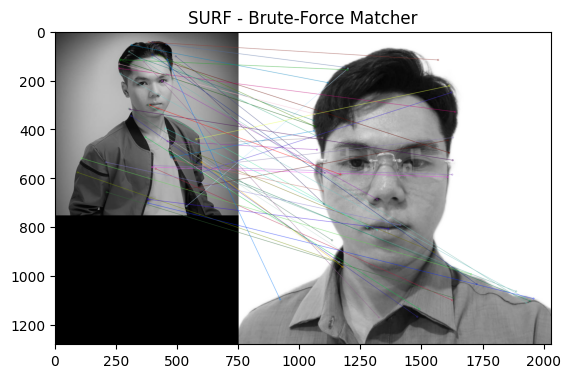

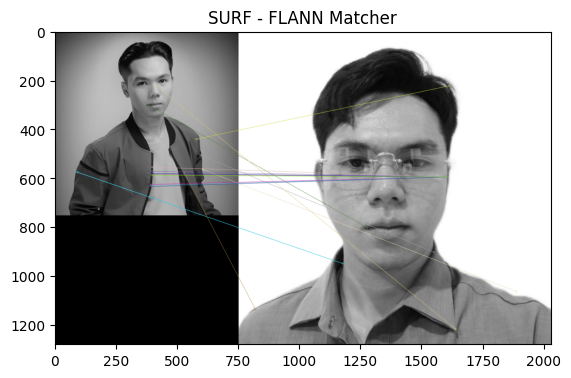


Analyzing ORB...

Method: ORB
Number of keypoints in Image 1: 500
Number of keypoints in Image 2: 500
Keypoint detection time: 0.0551 seconds
Brute-Force matching time: 0.0119 seconds
FLANN matching time: 0.0028 seconds
Number of Brute-Force matches: 94
Number of good FLANN matches: 3


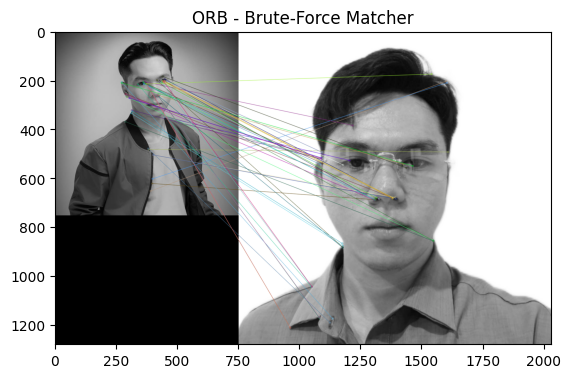

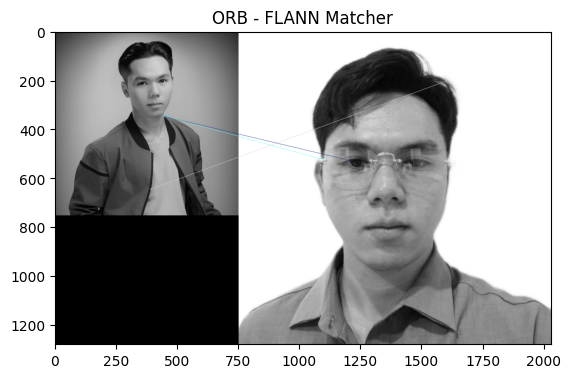

In [ ]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

# Load the images in grayscale
image1 = cv2.imread('/content/FB_IMG.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/IMG_20240909_141722_559.jpg', cv2.IMREAD_GRAYSCALE)

# Function to display matched images
def display_matches(img1, img2, kp1, kp2, matches, method, matcher):
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(matched_image)
    plt.title(f"{method} - {matcher} Matcher")
    plt.show()

# Performance Analysis Function
def analyze_performance(method_name, detector, bf_norm_type, flann_index_params):
    # Keypoint detection and description
    start_time = time.time()
    kp1, des1 = detector.detectAndCompute(image1, None)
    kp2, des2 = detector.detectAndCompute(image2, None)
    detection_time = time.time() - start_time

    # Brute-Force Matching
    bf = cv2.BFMatcher(bf_norm_type, crossCheck=True)
    start_time = time.time()
    bf_matches = bf.match(des1, des2)
    bf_matches = sorted(bf_matches, key=lambda x: x.distance)
    bf_match_time = time.time() - start_time

    # FLANN Matching
    flann = cv2.FlannBasedMatcher(flann_index_params, dict(checks=50))
    start_time = time.time()
    flann_matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test for FLANN matches
    good_flann_matches = []
    for m, n in flann_matches:
        if m.distance < 0.7 * n.distance:
            good_flann_matches.append(m)
    flann_match_time = time.time() - start_time

    # Print performance metrics
    print(f"\nMethod: {method_name}")
    print(f"Number of keypoints in Image 1: {len(kp1)}")
    print(f"Number of keypoints in Image 2: {len(kp2)}")
    print(f"Keypoint detection time: {detection_time:.4f} seconds")
    print(f"Brute-Force matching time: {bf_match_time:.4f} seconds")
    print(f"FLANN matching time: {flann_match_time:.4f} seconds")
    print(f"Number of Brute-Force matches: {len(bf_matches)}")
    print(f"Number of good FLANN matches: {len(good_flann_matches)}")

    # Display top 50 matches
    display_matches(image1, image2, kp1, kp2, bf_matches, method_name, "Brute-Force")
    display_matches(image1, image2, kp1, kp2, good_flann_matches, method_name, "FLANN")

# SIFT Analysis
print("Analyzing SIFT...")
sift_detector = cv2.SIFT_create()
analyze_performance("SIFT", sift_detector, bf_norm_type=cv2.NORM_L2, flann_index_params=dict(algorithm=1, trees=5))

# SURF Analysis
print("\nAnalyzing SURF...")
surf_detector = cv2.xfeatures2d.SURF_create(400)
analyze_performance("SURF", surf_detector, bf_norm_type=cv2.NORM_L2, flann_index_params=dict(algorithm=1, trees=5))

# ORB Analysis
print("\nAnalyzing ORB...")
orb_detector = cv2.ORB_create()
analyze_performance("ORB", orb_detector, bf_norm_type=cv2.NORM_HAMMING, flann_index_params=dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1))
